#### <p style="background-color:#F8F1E8; font-family:newtimeroman; color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px; padding: 20px; margin: 10px;">Importing Libraries
</p>


In [1]:
import io
import cv2
import time
import requests
import numpy as np
import pandas as pd
from time import sleep
from requests import get
from random import randint
from tabulate import tabulate
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from urllib.request import urlopen
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from msedge.selenium_tools import Edge, EdgeOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### <p style="background-color:#F8F1E8; font-family:newtimeroman; color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px; padding: 20px; margin: 10px;">Scraping the data Using Edge Selenium
</p>


In [2]:
edge_driver_path = r'C:\Users\hp\edgedriver_win64\msedgedriver.exe'
edge_options = EdgeOptions()

edge_options.use_chromium = True
edge_options.add_argument("detach:true")
edge_options.add_argument("--disable-extensions")
edge_options.add_argument("--disable-notifications")
edge_options.add_argument("--disable-Advertisement")
edge_options.add_argument("--disable-popup-blocking")
edge_options.add_argument("start-maximized")
edge_options.add_argument("--disable-infobars")

In [3]:
driver = webdriver.Edge(executable_path=edge_driver_path)
wait = WebDriverWait(driver, 5)

In [4]:
links = []
for page in range(0, 50):
    driver.get('https://myanimelist.net/topanime.php?limit=' + str(page))
    link = driver.find_elements(By.CSS_SELECTOR,'div[class="detail"] h3 a')
    for item in link:
        links.append(item.get_attribute('href'))


In [ ]:
driver.find_element(By.CSS_SELECTOR, 'div[class="detail"] h3 a').send_keys(Keys.CONTROL + Keys.RETURN)

# Switch to the new tab
driver.switch_to.window(driver.window_handles[-1])

titles = []
ratings = []
genres = []
ranks = []
popularity = []

for item_link in links:
    driver.get(item_link)
    
    try:
        title = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div.h1-title')))
        titles.append(title.text)
    except Exception as e:
        titles.append("Title not found")

    try:
        rating = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class*="score-label"]')))
        ratings.append(rating.text)
    except Exception as e:
        ratings.append("Rating not found")

    try:
        genre = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(text(), "Genre")]/parent::div')))
        genres.append(genre.text)
    except Exception as e:
        genres.append("Genre not found")
    
    try:
        rank_and_popularity = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[itemprop="aggregateRating"]')))
        rank_and_popularity_text = rank_and_popularity.text
        # Extract rank and popularity information from the text
        rank_index = rank_and_popularity_text.index('Score:') + len('Score:')
        rank_text = rank_and_popularity_text[rank_index:].split('\n')[0].strip()
        ranks.append(rank_text)
        popularity_index = rank_and_popularity_text.index('scored by') + len('scored by')
        popularity_text = rank_and_popularity_text[popularity_index:].split('users)')[0].strip()
        popularity.append(popularity_text)
    except Exception as e:
        ranks.append("Rank not found")
        popularity.append("Popularity not found")

# Close the current tab
driver.close()

# Switch back to the original tab
driver.switch_to.window(driver.window_handles[0])

for title, rating, genre, rank, pop in zip(titles, ratings, genres, ranks, popularity):
    print("Title:", title)
    print("Rating:", rating)
    print("Genre:", genre)
    print("Rank:", rank)
    print("Popularity:", pop)
    print("\n")


In [ ]:
driver.quit()

<p style="background-color:#D6BEC0; font-family:newtimeroman; color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px; padding: 20px; margin: 10px;">Testing the Anime Dataset
</p>


In [9]:
anime.head(2)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...


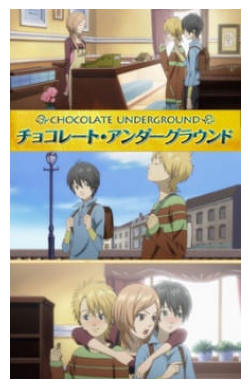

In [19]:
image_url = anime.loc[3400, 'Image URL']

# Load the image from the URL
with urlopen(image_url) as url:
    img = mpimg.imread(io.BytesIO(url.read()), format='jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [39]:
my_data = {'Title': titles, 'Rating': ratings, 'Genre': genres}
df = pd.DataFrame(data = my_data)

[]

<p style="background-color:#A67379; font-family:newtimeroman; color:#FFFFFF; font-size:150%; text-align:center; border-radius: 15px 50px; padding: 20px; margin: 10px;">Creating a new DatasetUsing MAL API
</p>


In [13]:
def fetch_anime_details(client_id, anime_id):
    url = f"https://api.myanimelist.net/v2/anime/{anime_id}"
    params = {
        "fields": "id,title,main_picture,alternative_titles,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,media_type,status,genres,num_episodes,start_season,source,average_episode_duration,rating,studios"
    }
    headers = {"X-MAL-CLIENT-ID": client_id}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return None 

client_id = "49ed3a687cc624bdc46bda437c169007"

anime_data = []
for anime_id in range(1, 25000):
    details = fetch_anime_details(client_id, anime_id)
    if details:
        anime_data.append({
            'anime_id': details.get('id'),
            'Name': details.get('title'),
            'English name': details.get('alternative_titles', {}).get('en'),
            'Other name': details.get('alternative_titles', {}).get('synonyms', []),
            'Score': details.get('mean'),
            'Genres': [genre['name'] for genre in details.get('genres', [])],
            'Synopsis': details.get('synopsis'),
            'Type': details.get('media_type'),
            'Episodes': details.get('num_episodes'),
            'Aired': f"{details.get('start_date')} to {details.get('end_date')}",
            'Premiered': f"{details.get('start_season', {}).get('year')} {details.get('start_season', {}).get('season')}",
            'Status': details.get('status'),
            'Studios': [studio['name'] for studio in details.get('studios', [])],
            'Source': details.get('source'),
            'Duration': details.get('average_episode_duration'),
            'Rating': details.get('rating'),
            'Rank': details.get('rank'),
            'Popularity': details.get('popularity'),
            'Scored By': details.get('num_scoring_users'),
            'Members': details.get('num_list_users'),
            'Image URL': details.get('main_picture', {}).get('medium')
        })

df = pd.DataFrame(anime_data)
print(df.head())


   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                                  Other name  Score  \
0                                         []   8.75   
1  [Cowboy Bebop: Knockin' on Heaven's Door]   8.38   
2                                         []   8.21   
3                                      [WHR]   7.24   
4                      [Adventure King Beet]   6.94   

                                              Genres  \
0  [Action, Adult Cast, Award Winning, Sci-Fi, Sp...   
1                [Action, Adult Cast, Sci-Fi, Space]   
2   [Action, Adult Cast, Adventure, Sci-Fi, Shounen]   
3  [Ac

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
<h3 align="left"><font color='#4E5672'>API Data Features</font></h3>
Anime Data Features

1. **anime_id**: The unique identifier for each anime.
2. **Name**: The title of the anime.
3. **English name**: The English title of the anime, if available.
4. **Other name**: Alternative titles or synonyms for the anime.
5. **Score**: The average score or rating of the anime.
6. **Genres**: The genres associated with the anime.
7. **Synopsis**: A brief summary or synopsis of the anime.
8. **Type**: The type or format of the anime (e.g., TV, movie, OVA).
9. **Episodes**: The number of episodes in the anime.
10. **Aired**: The airing dates of the anime.
11. **Premiered**: The season and year the anime premiered.
12. **Status**: The current status of the anime (e.g., airing, completed).
13. **Studios**: The studios involved in producing the anime.
14. **Source**: The source material for the anime.
15. **Duration**: The average duration of episodes.
16. **Rating**: The content rating of the anime.
17. **Rank**: The rank of the anime based on popularity or other criteria.
18. **Popularity**: A measure of the anime's popularity.
19. **Scored By**: The number of users who have scored the anime.
20. **Members**: The number of members who have added the anime to their list.
21. **Image URL**: The URL of the main image for the anime.


In [8]:
anime = pd.read_csv("anime-dataset-2023.csv")

In [14]:
anime.head(1)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      79 non-null     int64  
 1   Name          79 non-null     object 
 2   English name  79 non-null     object 
 3   Other name    79 non-null     object 
 4   Score         79 non-null     float64
 5   Genres        79 non-null     object 
 6   Synopsis      79 non-null     object 
 7   Type          79 non-null     object 
 8   Episodes      79 non-null     int64  
 9   Aired         79 non-null     object 
 10  Premiered     79 non-null     object 
 11  Status        79 non-null     object 
 12  Studios       79 non-null     object 
 13  Source        79 non-null     object 
 14  Duration      79 non-null     int64  
 15  Rating        79 non-null     object 
 16  Rank          79 non-null     int64  
 17  Popularity    79 non-null     int64  
 18  Scored By     79 non-null     in

<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:100%; text-align:left">
<h3 align="left"><font color='#4E5672'>API Data Features</font></h3>
User Data Features

1. **anime_id**: The unique identifier for each anime but it acts as a Foreign key fromt he above dataframe.
2. **Anime Title**: The title of the each anime.
3. **rating**: The average score or rating of the anime given by user.
4. **user_id**: The id associated with the user.
5. **Username**: A name assosiated with the user_id.

In [ ]:

def fetch_anime_details(client_id, anime_id):
    url = f"https://api.myanimelist.net/v2/anime/{anime_id}"
    params = {"fields": "id,title"}
    headers = {"X-MAL-CLIENT-ID": client_id}
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def fetch_user_data(anime_id):
    return {
        'user_id': "_user_id_" + str(anime_id),
        'Username': "User_" + str(anime_id),
        'rating': details.get('mean'),
    }

client_id = "49ed3a687cc624bdc46bda437c169007"

data = []
for anime_id in range(1,25000): 
    anime_details = fetch_anime_details(client_id, anime_id)
    if anime_details:
        user_data = fetch_user_data(anime_id)
        data.append({
            'user_id': user_data['user_id'],
            'Username': user_data['Username'],
            'anime_id': anime_details.get('id'),
            'Anime Title': anime_details.get('title'),
            'rating': user_data['rating']
        })

df = pd.DataFrame(data)
print(df.head())


<p style="background-color:#D6BEC0; font-family:newtimeroman; color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px; padding: 20px; margin: 10px;">Testing the User Dataset
</p>


In [2]:
data = pd.read_csv("users-score-2023.csv")

In [3]:
data.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


In [5]:
data.isnull().count()

user_id        24325191
Username       24325191
anime_id       24325191
Anime Title    24325191
rating         24325191
dtype: int64

In [7]:
print(data.groupby('Username').size().reset_index(name='Counts'))

               Username  Counts
0               -------     266
1         -------------      34
2               ------o      17
3              -----aaa     102
4       ----Adrenadroid       5
...                 ...     ...
270027         zzzrobin       2
270028       zzzsnorlax      14
270029            zzzsw       3
270030       zzzyeknom0     227
270031       zzzzzombie       1

[270032 rows x 2 columns]
